# Problem Statement>> predict Item outlet sales

# Imort all libraries

In [11]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Data Gathering

In [90]:
df=pd.read_csv('Sales_data.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.isna().sum()*100/len(df)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

<AxesSubplot:>

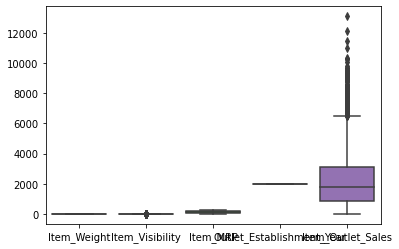

In [10]:
sns.boxplot(data=df)

(array([483., 870., 865., 664., 779., 629., 755., 735., 677., 603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <BarContainer object of 10 artists>)

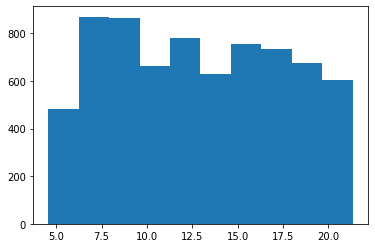

In [14]:
plt.hist(df['Item_Weight'])

In [18]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [25]:
df['Outlet_Size'].mode()[0]

'Medium'

In [26]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [32]:
x=df.drop(['Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']

In [36]:
df['Item_Fat_Content'].value_counts().to_dict()

{'Low Fat': 5089, 'Regular': 2889, 'LF': 316, 'reg': 117, 'low fat': 112}

In [37]:
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'},inplace=True)

In [38]:
df['Item_Fat_Content'].value_counts().to_dict()

{'Low Fat': 5517, 'Regular': 3006}

In [40]:
df['Item_Fat_Content'].replace({'Low Fat': 0, 'Regular': 1},inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 799.2+ KB


In [43]:
df['Item_Type'].value_counts().to_dict()

{'Fruits and Vegetables': 1232,
 'Snack Foods': 1200,
 'Household': 910,
 'Frozen Foods': 856,
 'Dairy': 682,
 'Canned': 649,
 'Baking Goods': 648,
 'Health and Hygiene': 520,
 'Soft Drinks': 445,
 'Meat': 425,
 'Breads': 251,
 'Hard Drinks': 214,
 'Others': 169,
 'Starchy Foods': 148,
 'Breakfast': 110,
 'Seafood': 64}

In [47]:
df_item_type=pd.get_dummies(df['Item_Type'],prefix='Type',drop_first=True)
df_item_type

,Type_Breads,Type_Breakfast,Type_Canned,Type_Dairy,Type_Frozen Foods,Type_Fruits and Vegetables,Type_Hard Drinks,Type_Health and Hygiene,Type_Household,Type_Meat,Type_Others,Type_Seafood,Type_Snack Foods,Type_Soft Drinks,Type_Starchy Foods
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8520,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8521,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   int64  
 8   Outlet_Type                8523 non-null   int64  
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 666.0+ KB


In [59]:
df['Outlet_Size'].value_counts().to_dict()

{'Medium': 5203, 'Small': 2388, 'High': 932}

In [60]:
df['Outlet_Size'].replace({'Medium': 1, 'Small': 0, 'High': 2},inplace=True)

In [62]:
df['Outlet_Location_Type'].value_counts().to_dict()

{'Tier 3': 3350, 'Tier 2': 2785, 'Tier 1': 2388}

In [77]:
df['Outlet_Location_Type'].replace({'Tier 3': 0, 'Tier 2': 1, 'Tier 1': 2},inplace=True)

In [74]:
df['Outlet_Type'].value_counts().to_dict()

{'Supermarket Type1': 5577,
 'Grocery Store': 1083,
 'Supermarket Type3': 935,
 'Supermarket Type2': 928}

In [75]:
df['Outlet_Type'].replace({'Supermarket Type1': 1,'Grocery Store': 0,'Supermarket Type3': 3,'Supermarket Type2': 2},inplace=True)

In [85]:
df_new=pd.concat([df,df_item_type],axis=1)
df_new

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Type_Fruits and Vegetables,Type_Hard Drinks,Type_Health and Hygiene,Type_Household,Type_Meat,Type_Others,Type_Seafood,Type_Snack Foods,Type_Soft Drinks,Type_Starchy Foods
0,9.300,0,0.016047,Dairy,249.8092,1999,1,2,1,3735.1380,...,0,0,0,0,0,0,0,0,0,0
1,5.920,1,0.019278,Soft Drinks,48.2692,2009,1,0,2,443.4228,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0,0.016760,Meat,141.6180,1999,1,2,1,2097.2700,...,0,0,0,0,1,0,0,0,0,0
3,19.200,1,0.000000,Fruits and Vegetables,182.0950,1998,1,0,0,732.3800,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0,0.000000,Household,53.8614,1987,2,0,1,994.7052,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,Snack Foods,214.5218,1987,2,0,1,2778.3834,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,1,0.046982,Baking Goods,108.1570,2002,1,1,1,549.2850,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0,0.035186,Health and Hygiene,85.1224,2004,0,1,1,1193.1136,...,0,0,1,0,0,0,0,0,0,0
8521,7.210,1,0.145221,Snack Foods,103.1332,2009,1,0,2,1845.5976,...,0,0,0,0,0,0,0,1,0,0


In [86]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Item_Weight                 8523 non-null   float64
 1   Item_Fat_Content            8523 non-null   int64  
 2   Item_Visibility             8523 non-null   float64
 3   Item_Type                   8523 non-null   object 
 4   Item_MRP                    8523 non-null   float64
 5   Outlet_Establishment_Year   8523 non-null   int64  
 6   Outlet_Size                 8523 non-null   int64  
 7   Outlet_Location_Type        8523 non-null   int64  
 8   Outlet_Type                 8523 non-null   int64  
 9   Item_Outlet_Sales           8523 non-null   float64
 10  Type_Breads                 8523 non-null   uint8  
 11  Type_Breakfast              8523 non-null   uint8  
 12  Type_Canned                 8523 non-null   uint8  
 13  Type_Dairy                  8523 

In [96]:
x=df_new.drop(['Item_Type','Item_Outlet_Sales'],axis=1)
y=df_new['Item_Outlet_Sales']

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [99]:
x_train.shape

(6818, 23)

In [100]:
x_test.shape

(1705, 23)

In [101]:
y_train.shape

(6818,)

In [102]:
y_test.shape

(1705,)

# Model Training

In [103]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [107]:
y_pred=model.predict(x_test)
y_pred

array([ 472.92218075, 1910.52848908, 3050.44129678, ..., 2376.46655473,
       2286.74391   , 1782.8135554 ])

# Testing data evaluation

In [109]:
y_pred=model.predict(x_test)

r2=r2_score(y_test,y_pred)
print("r2_score==",r2)

mse=mean_squared_error(y_test,y_pred)
print("MSE==",mse)

mae=mean_absolute_error(y_test,y_pred)
print("MAE==",mae)

r2_score== 0.5047053672606958
MSE== 1468210.9641458658
MAE== 920.010888730012


# Training Data Evaluation

In [110]:
y_pred=model.predict(x_train)

r2=r2_score(y_train,y_pred)
print("r2_score==",r2)

mse=mean_squared_error(y_train,y_pred)
print("MSE==",mse)

mae=mean_absolute_error(y_train,y_pred)
print("MAE==",mae)

r2_score== 0.5087041185921883
MSE== 1423840.923746178
MAE== 893.629214947712


# KNN Regression

In [116]:
from sklearn.neighbors import KNeighborsRegressor

# Normalisation

In [126]:
scaler=MinMaxScaler()
arr=scaler.fit_transform(x)
norm_x=pd.DataFrame(arr,columns=x.columns)
norm_x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Type_Breads,Type_Breakfast,...,Type_Fruits and Vegetables,Type_Hard Drinks,Type_Health and Hygiene,Type_Household,Type_Meat,Type_Others,Type_Seafood,Type_Snack Foods,Type_Soft Drinks,Type_Starchy Foods
0,0.282525,0.0,0.048866,0.927507,0.583333,0.5,1.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.081274,1.0,0.058705,0.072068,1.000000,0.5,0.0,0.666667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.770765,0.0,0.051037,0.468288,0.583333,0.5,1.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.871986,1.0,0.000000,0.640093,0.541667,0.5,0.0,0.000000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260494,0.0,0.000000,0.095805,0.083333,1.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.0,0.172914,0.777729,0.083333,1.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8519,0.227746,1.0,0.143069,0.326263,0.708333,0.5,0.5,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8520,0.359929,0.0,0.107148,0.228492,0.791667,0.0,0.5,0.333333,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8521,0.158083,1.0,0.442219,0.304939,1.000000,0.5,0.0,0.666667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Type_Breads', 'Type_Breakfast', 'Type_Canned',
       'Type_Dairy', 'Type_Frozen Foods', 'Type_Fruits and Vegetables',
       'Type_Hard Drinks', 'Type_Health and Hygiene', 'Type_Household',
       'Type_Meat', 'Type_Others', 'Type_Seafood', 'Type_Snack Foods',
       'Type_Soft Drinks', 'Type_Starchy Foods'],
      dtype='object')

In [137]:
x_train,x_test,y_train,y_test=train_test_split(norm_x,y,test_size=0.25,random_state=2)

In [138]:
knn_model=KNeighborsRegressor()
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [139]:
y_pred=model.predict(x_test)

r2=r2_score(y_test,y_pred)
print("r2_score==",r2)

mse=mean_squared_error(y_test,y_pred)
print("MSE==",mse)

mae=mean_absolute_error(y_test,y_pred)
print("MAE==",mae)

r2_score== -4.865529151200584
MSE== 18111734.58231063
MAE== 3921.9067253119256


In [140]:
y_pred=model.predict(x_train)

r2=r2_score(y_train,y_pred)
print("r2_score==",r2)

mse=mean_squared_error(y_train,y_pred)
print("MSE==",mse)

mae=mean_absolute_error(y_train,y_pred)
print("MAE==",mae)

r2_score== -5.135811612427619
MSE== 17500400.395248357
MAE== 3867.2090750170273


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

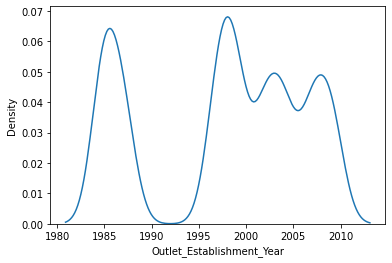

In [136]:
sns.kdeplot(x=df['Outlet_Establishment_Year'])

In [148]:
knn_model=KNeighborsRegressor()
hyp=[{'n_neighbors': np.arange(5,50), 'p':[1,2]}]
gscv_knn=GridSearchCV(knn_model,hyp,cv=5)
gscv_knn.fit(x_train,y_train)
gscv_knn.best_estimator_

KNeighborsRegressor(n_neighbors=9, p=1)

In [149]:
knn_model=gscv_knn.best_estimator_
knn_model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=9, p=1)

In [150]:
y_pred=model.predict(x_test)

r2=r2_score(y_test,y_pred)
print("r2_score==",r2)

mse=mean_squared_error(y_test,y_pred)
print("MSE==",mse)

mae=mean_absolute_error(y_test,y_pred)
print("MAE==",mae)

r2_score== -4.865529151200584
MSE== 18111734.58231063
MAE== 3921.9067253119256


In [151]:
from sklearn.ensemble import RandomForestRegressor

In [152]:
x_train,x_test,y_train,y_test=train_test_split(norm_x,y,test_size=0.25,random_state=2)

In [154]:
rf_model= RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [155]:
y_pred=model.predict(x_test)

r2=r2_score(y_test,y_pred)
print("r2_score==",r2)

mse=mean_squared_error(y_test,y_pred)
print("MSE==",mse)

mae=mean_absolute_error(y_test,y_pred)
print("MAE==",mae)

r2_score== -4.865529151200584
MSE== 18111734.58231063
MAE== 3921.9067253119256
